In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np
import pandas as pd

In [3]:
iris = load_iris()

x_train, x_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size=0.2)
model = SVC(kernel='rbf', gamma=0.2, C=0.1)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.9333333333333333

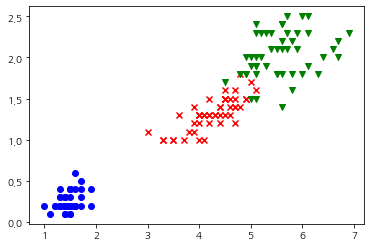


* 학습용 데이터로 측정한 정확도 = 0.97
* 시험용 데이터로 측정한 정확도 = 0.97


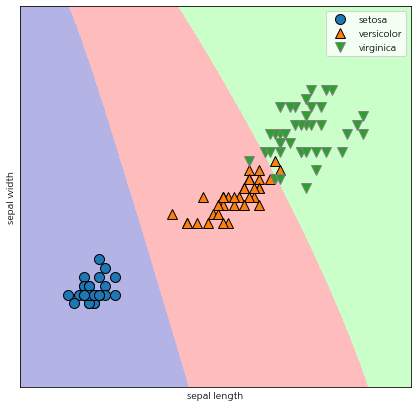

optG = 0.10
optC = 0.20
optAcc = 0.97

* 학습용 데이터로 측정한 정확도 = 0.97
* 시험용 데이터로 측정한 정확도 = 0.97


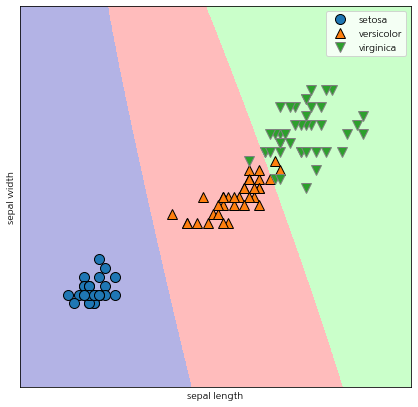

In [6]:
# -*- coding: utf-8 -*-

# !pip install mglearn

# linear-SVM으로 iris 데이터를 학습한다.
# -------------------------------------
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import mglearn
import numpy as np
import pandas as pd

iris = load_iris()

# 기본 코드
x_train, x_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size=0.2)
model = SVC(kernel='rbf', gamma=0.2, C=1.0)
model.fit(x_train, y_train)
model.score(x_test, y_test)

# 시각화를 위해 sepal length와 sepal width 만 사용한다.
x = iris.data[:, [2, 3]] # colume 0과 1만 사용함.
y = iris.target

df = pd.DataFrame(data= np.c_[x, y], columns= ['x', 'y', 'target'])
df.head()

plt.scatter(df[df['target'] == 0.0]['x'], df[df['target'] == 0.0]['y'], marker='o', c='blue')
plt.scatter(df[df['target'] == 1.0]['x'], df[df['target'] == 1.0]['y'], marker='x', c='red')
plt.scatter(df[df['target'] == 2.0]['x'], df[df['target'] == 2.0]['y'], marker='v', c='green')
plt.show()

# Train 데이터 세트와 Test 데이터 세트를 구성한다
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# SVM으로 Train 데이터 세트를 학습한다.
model = SVC(kernel='rbf', gamma=0.2, C=1.0)
model.fit(x_train, y_train)

# Test 세트의 Feature에 대한 class를 추정하고, 정확도를 계산한다
print()
print("* 학습용 데이터로 측정한 정확도 = %.2f" % model.score(x_train, y_train))
print("* 시험용 데이터로 측정한 정확도 = %.2f" % model.score(x_test, y_test))

# 시각화
plt.figure(figsize=[7,7])
mglearn.plots.plot_2d_classification(model, x_train, alpha=0.3)
mglearn.discrete_scatter(x_train[:,0], x_train[:,1], y_train)
plt.legend(iris.target_names)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

# gamma와 C의 조합을 바꿔가면서 학습 데이터의 정확도가 최대인 조합을 찾는다
optAcc = -999
optG = 0
optC = 0
for gamma in np.arange(0.1, 5.0, 0.1):
    for c in np.arange(0.1, 5.0, 0.1):
        model = SVC(kernel='rbf', gamma=gamma, C=c)
        model.fit(x_train, y_train)
        acc = model.score(x_test, y_test)
        
        if acc > optAcc:
            optG = gamma
            optC = c
            optAcc = acc

print('optG = %.2f' % optG)
print('optC = %.2f' % optC)
print('optAcc = %.2f' % optAcc)

# 최적 조건으로 다시 학습한다.
model = SVC(kernel='rbf', gamma=optG, C=optC)
model.fit(x_train, y_train)

# Test 세트의 Feature에 대한 class를 추정하고, 정확도를 계산한다
print()
print("* 학습용 데이터로 측정한 정확도 = %.2f" % model.score(x_train, y_train))
print("* 시험용 데이터로 측정한 정확도 = %.2f" % model.score(x_test, y_test))

# 시각화
plt.figure(figsize=[7,7])
mglearn.plots.plot_2d_classification(model, x_train, alpha=0.3)
mglearn.discrete_scatter(x_train[:,0], x_train[:,1], y_train)
plt.legend(iris.target_names)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [7]:
np.arange(0.1, 5.0, 0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])